In [1]:
%load_ext autoreload
%autoreload 2

In [67]:
import torch
import pandas as pd
from copy import deepcopy
from tqdm import tqdm

from training_new import get_data_loaders, train
from model import Model, DummyModel
from inference import greedy_inference_single, beam_inference_single
from util import create_graph_no_sol
import numpy as np

# Training

In [3]:
graphs_path = "./solver/sol_examples/vrp20/sols.pkl"

In [4]:
train_dl, valid_dl, _ = get_data_loaders(graphs_path, batch_size=5, max_instances=20)

Parsing Graphs: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 102.30it/s]


In [5]:
model = Model(4, 32, 2, 0.0)
stats_df = train(
    model,
    graphs_path,
    epochs=12,
    batch_size=32,
    learning_rate=3e-4,
    max_instances=3000,
    max_inference_graphs=100
)

Parsing Graphs: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:28<00:00, 106.98it/s]


Valid 0 - loss:1.8937, acc:0.2951, eval_avg_cost:13.1622


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1714/1714 [00:09<00:00, 178.11it/s]


1.2775652408599854
Train 1 - loss:1.2776, acc:0.5566
Valid 1 - loss:1.1622, acc:0.5975, eval_avg_cost:7.9045


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1714/1714 [00:07<00:00, 218.78it/s]


1.0772980451583862
Train 2 - loss:1.0773, acc:0.6275
Valid 2 - loss:1.0352, acc:0.6476, eval_avg_cost:7.5630


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1714/1714 [00:07<00:00, 214.52it/s]


1.0086156129837036
Train 3 - loss:1.0086, acc:0.6528
Valid 3 - loss:0.9904, acc:0.6557, eval_avg_cost:7.5010


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1714/1714 [00:08<00:00, 201.76it/s]


0.977177083492279
Train 4 - loss:0.9772, acc:0.6644
Valid 4 - loss:0.9619, acc:0.6654, eval_avg_cost:7.4466


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1714/1714 [00:07<00:00, 232.07it/s]


0.9549722671508789
Train 5 - loss:0.9550, acc:0.6703
Valid 5 - loss:0.9474, acc:0.6691, eval_avg_cost:7.5775


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1714/1714 [00:07<00:00, 236.41it/s]


0.9372795224189758
Train 6 - loss:0.9373, acc:0.6770
Valid 6 - loss:0.9306, acc:0.6734, eval_avg_cost:7.4832


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1714/1714 [00:07<00:00, 220.25it/s]


0.9240511059761047
Train 7 - loss:0.9241, acc:0.6806
Valid 7 - loss:0.9152, acc:0.6800, eval_avg_cost:7.4546


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1714/1714 [00:08<00:00, 209.33it/s]


0.9136597514152527
Train 8 - loss:0.9137, acc:0.6835
Valid 8 - loss:0.9042, acc:0.6826, eval_avg_cost:7.4292


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1714/1714 [00:09<00:00, 188.20it/s]


0.9050817489624023
Train 9 - loss:0.9051, acc:0.6863
Valid 9 - loss:0.8985, acc:0.6829, eval_avg_cost:7.4340


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1714/1714 [00:07<00:00, 234.41it/s]


0.8978080153465271
Train 10 - loss:0.8978, acc:0.6891
Valid 10 - loss:0.8933, acc:0.6848, eval_avg_cost:7.3848


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1714/1714 [00:07<00:00, 236.42it/s]


0.8921335339546204
Train 11 - loss:0.8921, acc:0.6911
Valid 11 - loss:0.8895, acc:0.6876, eval_avg_cost:7.3754


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1714/1714 [00:07<00:00, 235.08it/s]


0.8869757056236267
Train 12 - loss:0.8870, acc:0.6941
Valid 12 - loss:0.8862, acc:0.6886, eval_avg_cost:7.3790


In [6]:
pd.to_pickle(model, "./models/vrp20_best.pkl")

In [7]:
stats_df = stats_df.set_index(["metric", "epoch"]).unstack("metric")["value"]

<AxesSubplot:xlabel='epoch'>

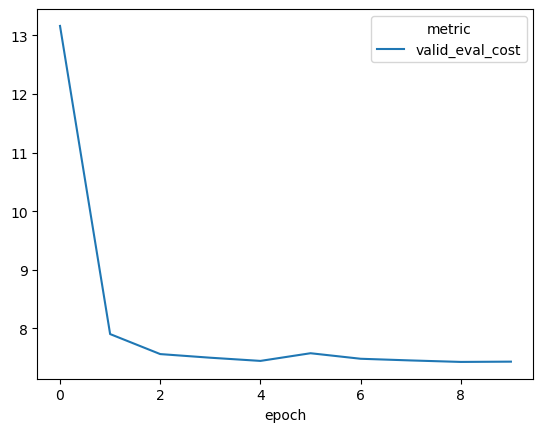

In [8]:
stats_df[["valid_eval_cost"]].iloc[:10].plot()

[]

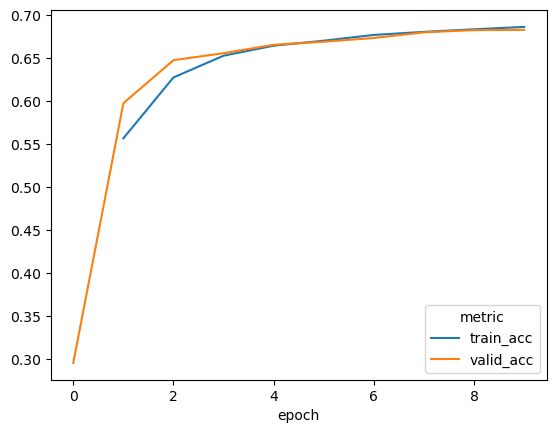

In [9]:
stats_df[["train_acc", "valid_acc"]].iloc[:10].plot().plot()

[]

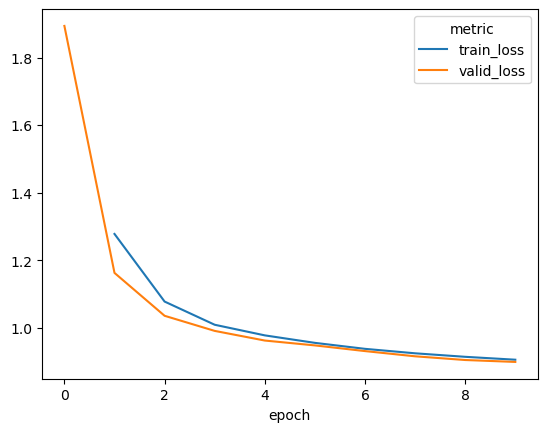

In [10]:
stats_df[["train_loss", "valid_loss"]].iloc[:10].plot().plot()

# Beam Search Testing

In [30]:
graphs = pd.read_pickle(graphs_path)
graph_collections = [create_graph_no_sol(g) for g, _ in graphs]

In [32]:
testing_graphs = graph_collections[-1000:]

In [33]:
solved_graphs = []
for g in tqdm(testing_graphs[-200:]):
    g = deepcopy(g)
    res_g = beam_inference_single(model, g, beam_width=8)
    # res_g = greedy_inference_single(model, g)
    solved_graphs.append(res_g)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [12:21<00:00,  3.71s/it]


saved


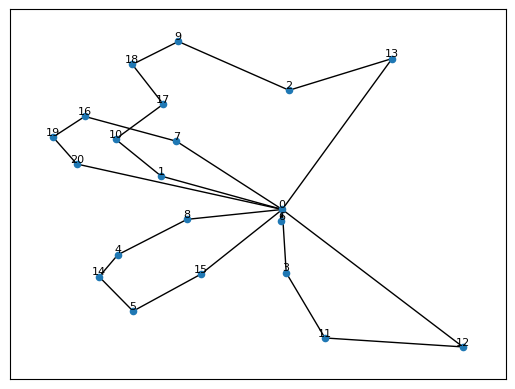

In [46]:
example_g = solved_graphs[34].get_all_graphs()[-1]
example_g.draw_graph(labels=True)

saved


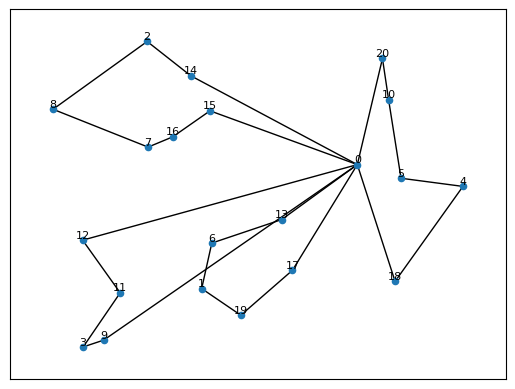

In [58]:
example_g = solved_graphs[181].get_all_graphs()[-1]
example_g.draw_graph(labels=True)

saved


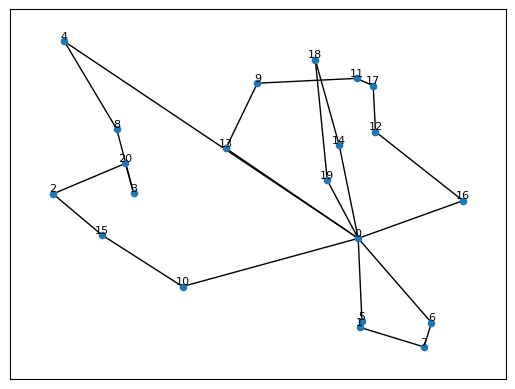

In [66]:
example_g = solved_graphs[124].get_all_graphs()[-1]
example_g.draw_graph(labels=True)

In [69]:
other_beam_sols = [
    "./models/solved_graphs_200_400.pkl",
    "./models/solved_graphs_400_600.pkl",
    "./models/solved_graphs_600_800.pkl",
    "./models/solved_graphs_800_1000.pkl",
]
beam_sols = [pd.read_pickle(sols) for sols in other_beam_sols]

In [76]:
all_beam_sols = []
for sols in [solved_graphs] + beam_sols:
    all_beam_sols.extend(sols)

In [78]:
np.mean([sg.get_full_solution_cost() for sg in all_beam_sols])

7.072080555556033

# Greedy Search Testing

In [79]:
all_greedy_sols = []
for g in tqdm(testing_graphs[-1000:]):
    g = deepcopy(g)
    # res_g = beam_inference_single(model, g, beam_width=8)
    res_g = greedy_inference_single(model, g)
    all_greedy_sols.append(res_g)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:40<00:00, 24.84it/s]


In [80]:
np.mean([sg.get_full_solution_cost() for sg in all_greedy_sols])

7.483752058946344